## XGBoost - Housing Prices in California

In [3]:
import numpy as np
import pandas as pd
import xgboost

In [4]:
# Getting training and testing data
features_train = pd.read_csv('X_train.csv', index_col = 0)
features_test = pd.read_csv('X_test.csv', index_col = 0)
labels_train = pd.read_csv('y_train.csv', index_col = 0).squeeze()
labels_test = pd.read_csv('y_test.csv', index_col = 0).squeeze()

In [5]:
print(features_train.shape)
print(labels_train.shape)
print(features_test.shape)
print(labels_test.shape)

(41331, 1254)
(41331,)
(27554, 1254)
(27554,)


In [6]:
from datetime import datetime

# Record the start time
start_time = datetime.now()

In [7]:
# Features:
PERCENTAGE_OF_FEATURES_USED = 1
LEARNING_RATE = 0.01
MAX_DEPTH = 6 # 6 8
NUMBER_OF_BOOSTING_ROUNDS = 20000

In [8]:
model = xgboost.XGBRegressor(colsample_bytree = PERCENTAGE_OF_FEATURES_USED,
                             learning_rate = LEARNING_RATE,
                             max_depth = MAX_DEPTH,
                             n_estimators = NUMBER_OF_BOOSTING_ROUNDS)

In [9]:
model.fit(features_train, labels_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=20000,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [10]:
prediction = model.predict(features_test)

In [11]:
# Record the end time
end_time = datetime.now()

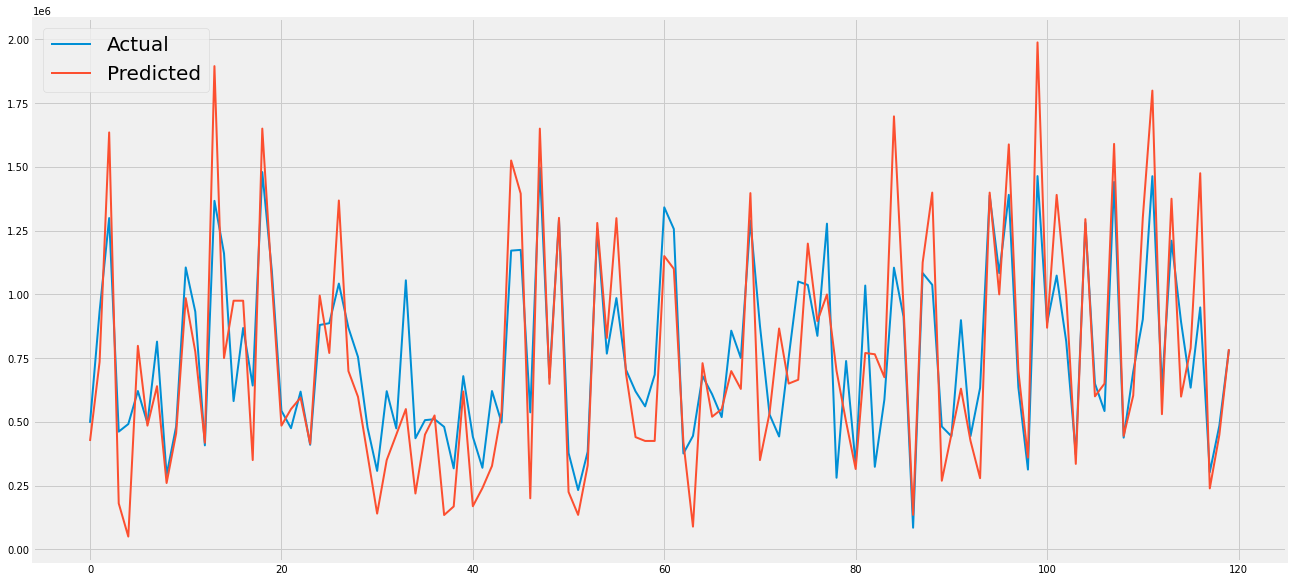

In [12]:
import matplotlib.pyplot as plt
grp = pd.DataFrame({'prediction': prediction,'Actual': labels_test})
grp = grp.reset_index()
grp = grp.drop(['index'],axis=1)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10))
plt.plot(grp[:120],linewidth=2)
plt.legend(['Actual','Predicted'],prop={'size': 20})

In [13]:
from sklearn.metrics import mean_squared_error,  mean_absolute_error, r2_score
from math import sqrt

print("Run Time Duration:", (end_time - start_time))
print("\n----------\n")

target_mean = labels_test.mean()
print(f'Target mean: {target_mean:.2f}')

r2xgb = r2_score(labels_test, prediction)
print(f'The R squared of the xgboost method is: {r2xgb:.2f}')

mae = mean_absolute_error(labels_test, prediction)
print(f'The Mean Absolute Error (MAE) of the xgboost method is: {mae:.2f}')

rmse = sqrt(mean_squared_error(labels_test, prediction))
print(f'The Root Mean Squared Error (RMSE) of the xgboost method is: {rmse:.2f}')
print("Relative RMSE (as a percentage of target mean):", (rmse / target_mean) * 100, "%")

Run Time Duration: 0:13:38.452508

----------

Target mean: 756575.07
The R squared of the xgboost method is: 0.68
The Mean Absolute Error (MAE) of the xgboost method is: 171888.10
The Root Mean Squared Error (RMSE) of the xgboost method is: 248623.19
Relative RMSE (as a percentage of target mean): 32.86166835230556 %
